In [49]:
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
import statistics

import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

import squarify

# Data Preparation and Cleaning

In [50]:
df = pd.read_csv('wine_reviews_small.csv')

In [51]:
print('Total number of Records : {} \nTotal number of Attribute : {}'.format(df.shape[0],df.shape[1]))

Total number of Records : 29665 
Total number of Attribute : 14


In [52]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29665 entries, 0 to 29664
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             29665 non-null  int64  
 1   country                29650 non-null  object 
 2   description            29665 non-null  object 
 3   designation            21216 non-null  object 
 4   points                 29665 non-null  int64  
 5   price                  27540 non-null  float64
 6   province               29650 non-null  object 
 7   region_1               24699 non-null  object 
 8   region_2               11411 non-null  object 
 9   taster_name            23544 non-null  object 
 10  taster_twitter_handle  22428 non-null  object 
 11  title                  29665 non-null  object 
 12  variety                29665 non-null  object 
 13  winery                 29665 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 3.2+

In [54]:
df.drop(columns=['Unnamed: 0'], inplace=True) #Droping unwanted columns

In [55]:
df.describe()

,points,price
count,29665.000000,27540.000000
mean,88.385539,34.990123
std,3.010396,40.472213
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,2500.000000


### Handling Missing Values

In [56]:
df.isnull().sum()

country                     15
description                  0
designation               8449
points                       0
price                     2125
province                    15
region_1                  4966
region_2                 18254
taster_name               6121
taster_twitter_handle     7237
title                        0
variety                      0
winery                       0
dtype: int64

In [57]:
#filling Quantative missing variable 
df.fillna(df.mean(), inplace=True)

In [58]:
df.isnull().sum()

country                     15
description                  0
designation               8449
points                       0
price                        0
province                    15
region_1                  4966
region_2                 18254
taster_name               6121
taster_twitter_handle     7237
title                        0
variety                      0
winery                       0
dtype: int64

In [59]:
#filling Qualitative missing variable 
df=df.fillna(df.mode().iloc[0])


In [60]:
df.isnull().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

# Data Visualization

## >> Wine Makers Country

In [61]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [62]:
top_wine_maker_countries = df.country.value_counts()
top_wine_maker_countries[:10]

US           12292
France        5030
Italy         4500
Spain         1503
Portugal      1336
Chile         1085
Argentina      901
Austria        777
Australia      504
Germany        493
Name: country, dtype: int64

C:\Users\juhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



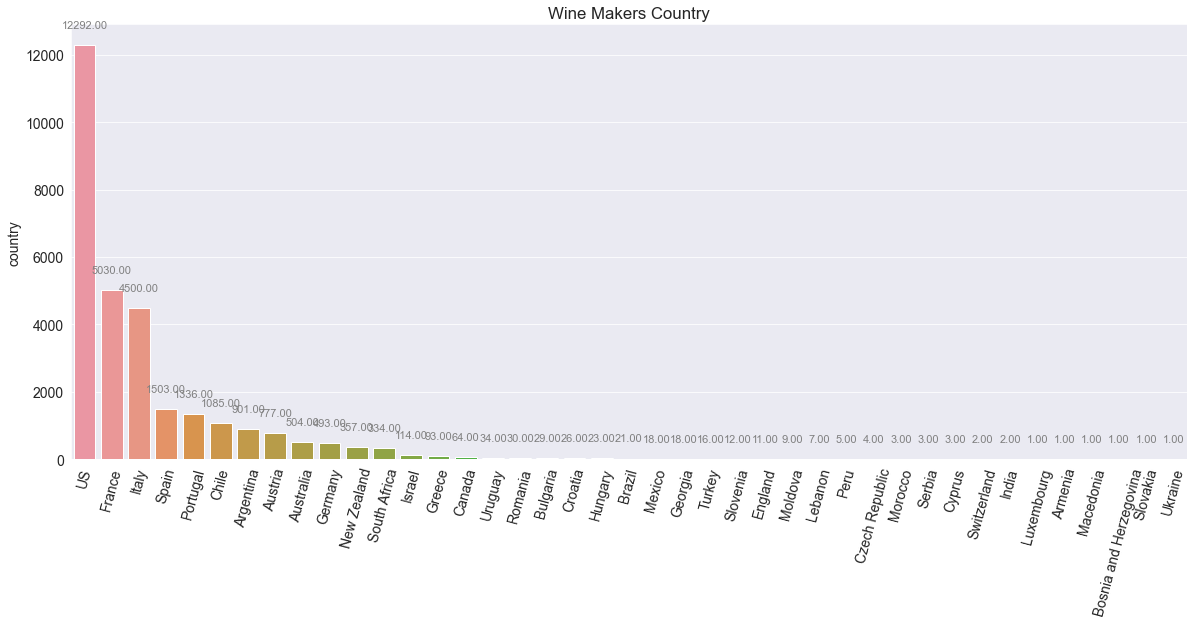

In [63]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=75)
plt.title('Wine Makers Country')
top_10_wine_maker_countries=top_wine_maker_countries
l = sns.barplot(top_10_wine_maker_countries.index,top_10_wine_maker_countries);

ax=l
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

## >> Points given to Wines

In [64]:
top_wine_points = df.points.value_counts()
top_wine_points

87     4106
88     3751
90     3524
86     3001
89     2666
91     2427
85     2337
92     2245
84     1530
93     1412
94      975
83      645
82      428
95      250
81      138
96      105
80       70
97       36
98       15
99        2
100       2
Name: points, dtype: int64

C:\Users\juhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



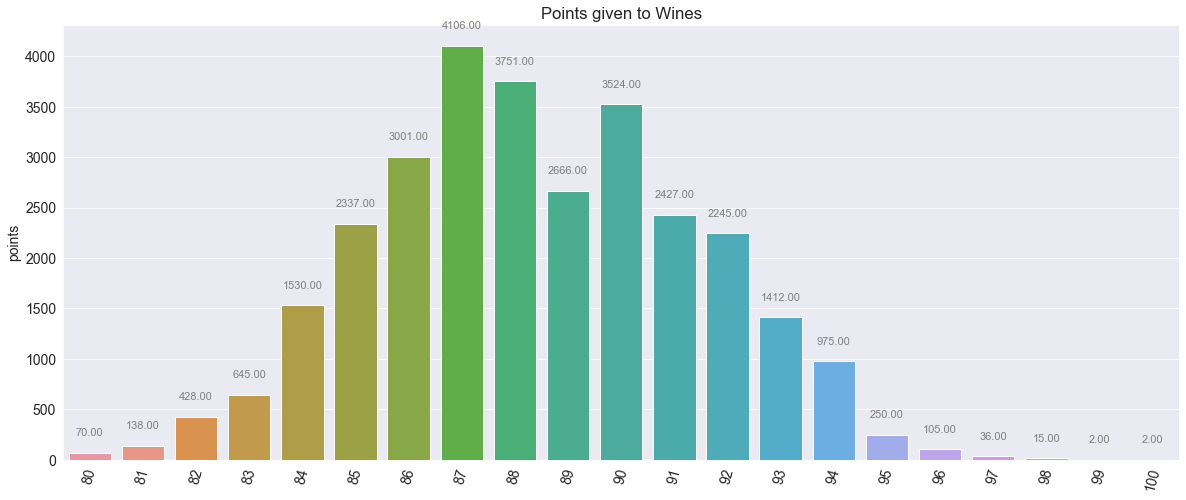

In [65]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=75)
plt.title('Points given to Wines')
top_10_wine_points=top_wine_points
l = sns.barplot(top_10_wine_points.index,top_10_wine_points);

ax=l
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

## >> Price distribution of wines

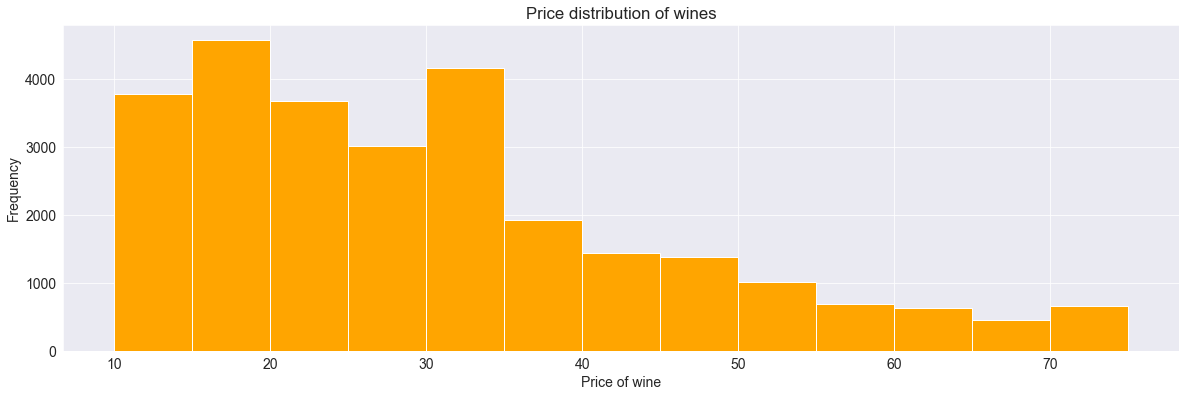

In [66]:
plt.figure(figsize=(20, 6))
plt.title('Price distribution of wines')
plt.xlabel('Price of wine')
plt.ylabel('Frequency')

plt.hist(df.price, bins=np.arange(10,80,5), color='orange');


## >> Average Price of Wines for each country

In [67]:
avg_price_by_country = df.groupby("country").mean()

In [68]:
avg_price_by_country

,points,price
country,,
Argentina,86.618202,23.884485
Armenia,87.000000,14.000000
Australia,88.496032,34.547423
Austria,90.248391,32.721731
Bosnia and Herzegovina,85.000000,13.000000
Brazil,83.904762,24.093357
Bulgaria,87.551724,12.172414
Canada,89.390625,36.874846
Chile,86.593548,21.447799


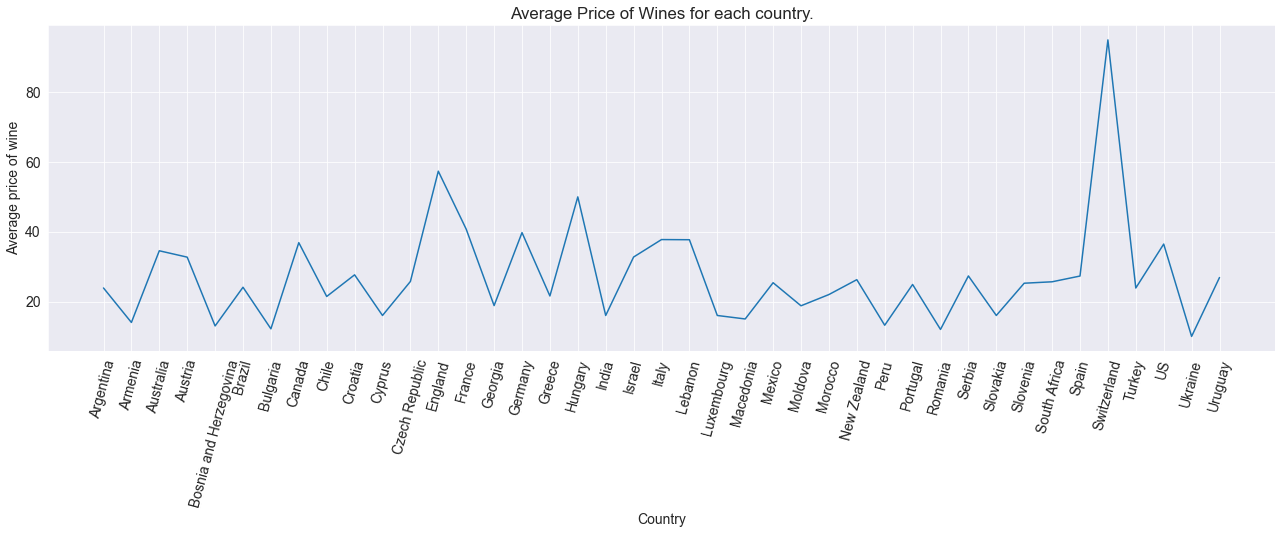

In [69]:
plt.figure(figsize= (22,6))
plt.title('Average Price of Wines for each country.')
plt.plot(avg_price_by_country.index, avg_price_by_country.price)
plt.xticks(rotation=75)
plt.xlabel('Country')
plt.ylabel('Average price of wine');


## >> Scatter Plot of Points and Price

C:\Users\juhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



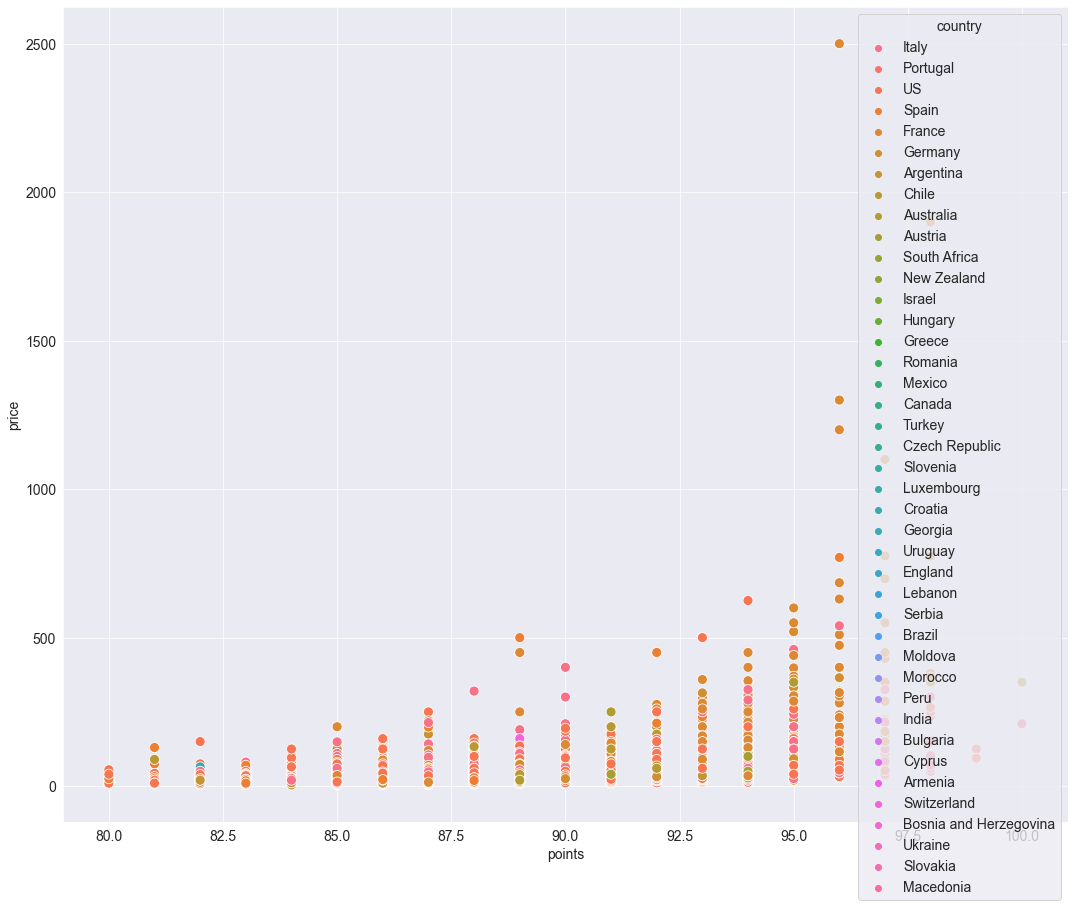

In [70]:
plt.figure(figsize= (18,15))
sns.scatterplot(df.points, df.price, hue=df.country, s=100);

# >> Outliers in Points

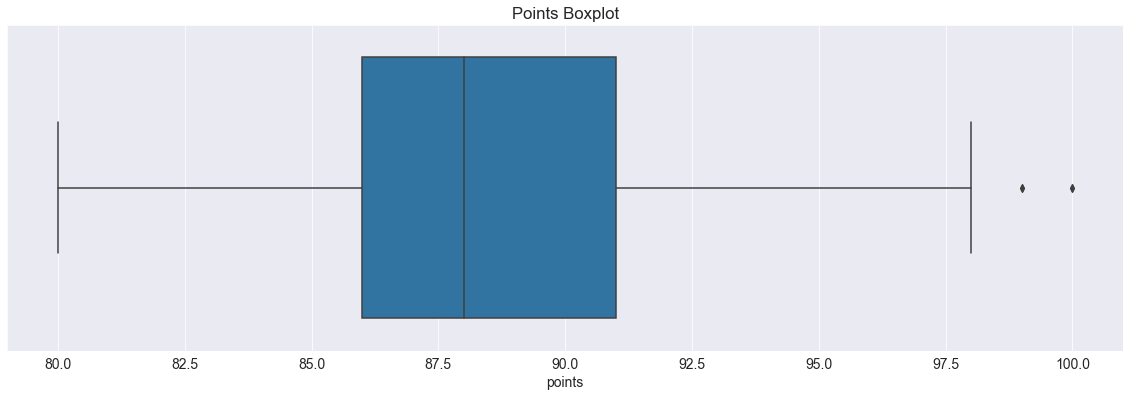

In [71]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df.points)
plt.title("Points Boxplot")
plt.show()


# >> Outliers in Price

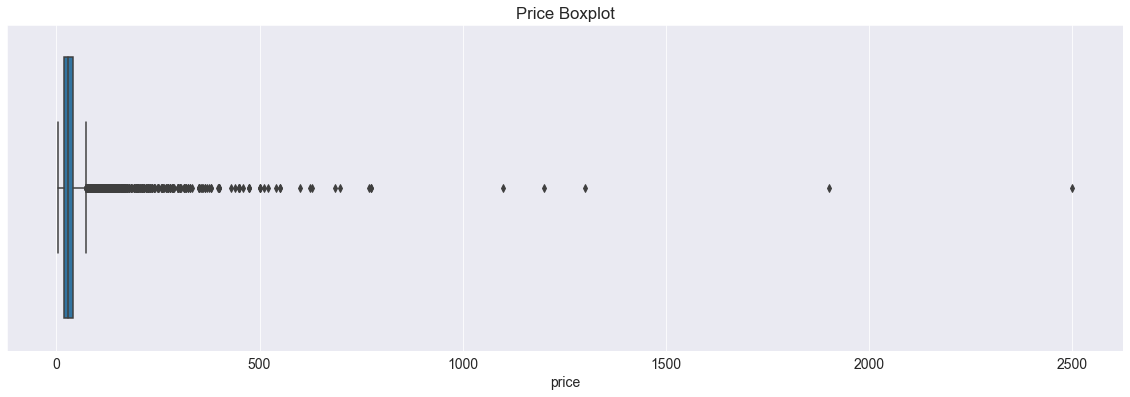

In [72]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df.price)
plt.title("Price Boxplot")
plt.show()


# Q1. Top 10 Wine makers Country

C:\Users\juhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



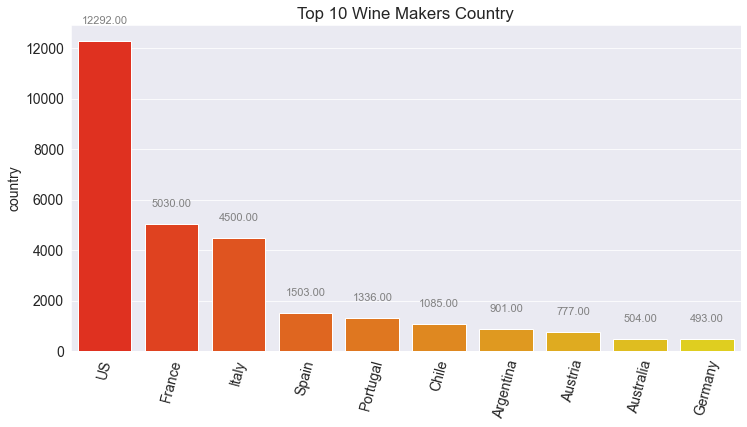

In [73]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.title('Top 10 Wine Makers Country')
top_10_wine_maker_countries=top_wine_maker_countries[:10]
l=sns.barplot(top_10_wine_maker_countries.index,top_10_wine_maker_countries ,palette="autumn");

ax=l
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

# Q2. Top 10 wine varieties are rated the best

In [74]:
highly_rated_wine = df.sort_values(by="points", ascending=False).head(10)
highly_rated_wine[['country','variety','points','price']]

,country,variety,points,price
7335,Italy,Prugnolo Gentile,100,210.0
345,Australia,Muscat,100,350.0
1556,US,Cabernet Sauvignon,99,125.0
1557,US,Pinot Noir,99,94.0
16437,Italy,Nebbiolo,98,300.0
346,Australia,Muscadelle,98,350.0
16186,Germany,Riesling,98,775.0
16435,Italy,Nebbiolo,98,70.0
16436,Italy,Nebbiolo,98,151.0
16434,Italy,Nebbiolo,98,60.0


# Q3. 10 wine varieties are rated the least

In [75]:
low_rated_wine = df.sort_values(by="points").head(10)
low_rated_wine[['country','variety','points','price']]

,country,variety,points,price
23101,Argentina,Malbec,80,5.0
12689,US,Cabernet Sauvignon,80,28.0
16510,Italy,Sangiovese,80,11.0
28234,US,Petit Verdot,80,40.0
28233,US,Red Blend,80,55.0
28231,Spain,Sparkling Blend,80,27.0
28230,US,Sauvignon Blanc,80,10.0
28229,US,Sauvignon Blanc,80,18.0
28228,US,Sauvignon Blanc,80,18.0
28227,Spain,Garnacha,80,8.0


# Q4. Which is costliest Wine Vairety?

In [76]:
Costliest_wine = df.sort_values(by="price",ascending=False).head(10)
Costliest_wine[['country','variety','points','price']]

,country,variety,points,price
15504,France,Bordeaux-style Red Blend,96,2500.0
1558,France,Bordeaux-style Red Blend,98,1900.0
1575,France,Bordeaux-style Red Blend,96,1300.0
1571,France,Bordeaux-style Red Blend,96,1200.0
1566,France,Bordeaux-style Red Blend,97,1100.0
347,Germany,Riesling,97,775.0
16186,Germany,Riesling,98,775.0
15510,Spain,Carignan,96,770.0
15497,France,Bordeaux-style White Blend,97,698.0
20743,France,Bordeaux-style Red Blend,96,685.0


# Q5. Which is Cheapest Wine Vairety?

In [77]:
Cheapest_wine = df.sort_values(by="price",).head(10)
Cheapest_wine[['country','variety','points','price']]

,country,variety,points,price
1987,Spain,Syrah,85,4.0
20148,US,White Blend,85,4.0
29217,Argentina,Malbec-Syrah,84,4.0
24256,Chile,Sauvignon Blanc,87,5.0
5789,France,Cabernet Sauvignon,83,5.0
7605,Chile,Cabernet Sauvignon,83,5.0
23101,Argentina,Malbec,80,5.0
3950,Portugal,Rosé,83,5.0
24547,Portugal,Portuguese Red,85,5.0
21864,US,Pinot Grigio,85,5.0


# Q6. Top 10 points given to Wines

In [78]:
top_wine_points = df.points.value_counts()
top_wine_points[:10]

87    4106
88    3751
90    3524
86    3001
89    2666
91    2427
85    2337
92    2245
84    1530
93    1412
Name: points, dtype: int64

C:\Users\juhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



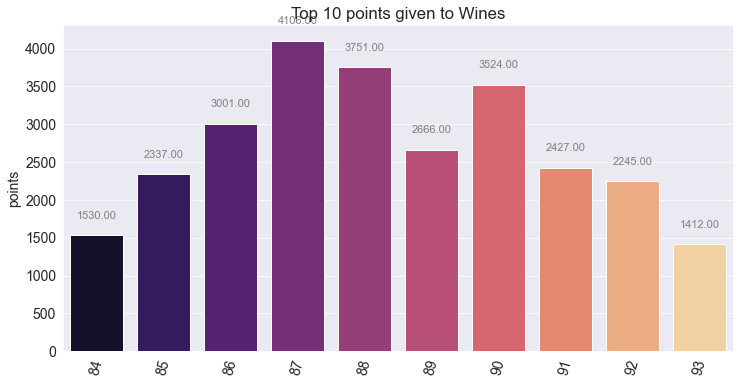

In [79]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.title('Top 10 points given to Wines')
top_10_wine_points=top_wine_points[:10]
l=sns.barplot(top_10_wine_points.index,top_10_wine_points,palette="magma");

ax=l
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

# Q7. Average points scored by Top 10 Countries

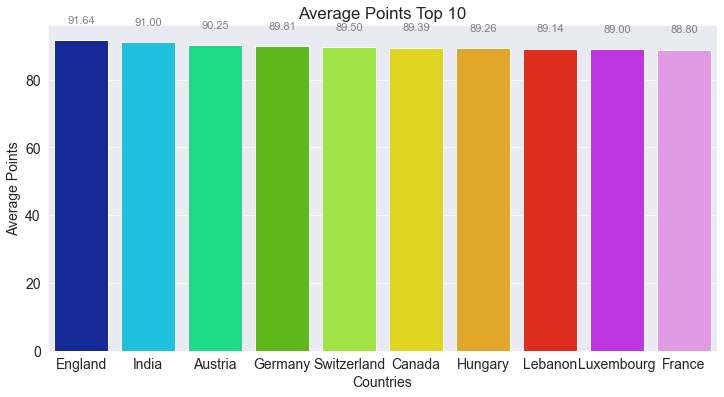

In [80]:
plt.figure(figsize=(12,6))
l=sns.barplot(x=df.groupby("country").mean().sort_values(by="points",ascending=False).points.index[:10], y=df.groupby("country").mean().sort_values(by="points",ascending=False).points.values[:10], palette="gist_ncar")
plt.xlabel("Countries")
plt.ylabel("Average Points")
plt.title("Average Points Top 10")
ax=l
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

# Q8. Average Wine Price by Top 10 Countries

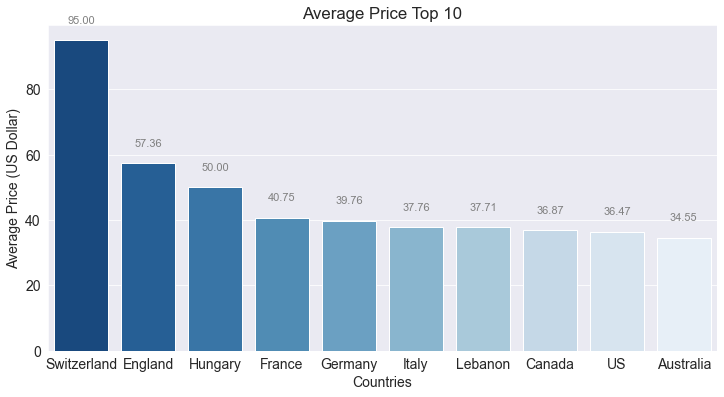

In [81]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=df.groupby("country").mean().sort_values(by="price",ascending=False).price.index[:10], y=df.groupby("country").mean().sort_values(by="price",ascending=False).price.values[:10], palette="Blues_r")
plt.xlabel("Countries")
plt.ylabel("Average Price (US Dollar)")
plt.title("Average Price Top 10")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

# Conclusion

# Acquisition by each Country according Points given

In [82]:
best100RatedWines = df.sort_values(by="points", ascending=False).head(100)
labels = best100RatedWines.country.value_counts().index
values = best100RatedWines.country.value_counts().values

trace = go.Pie(labels=labels, values=values)

iplot([trace])

# Best Wine Variety

(0.0, 100.0, 0.0, 100.0)

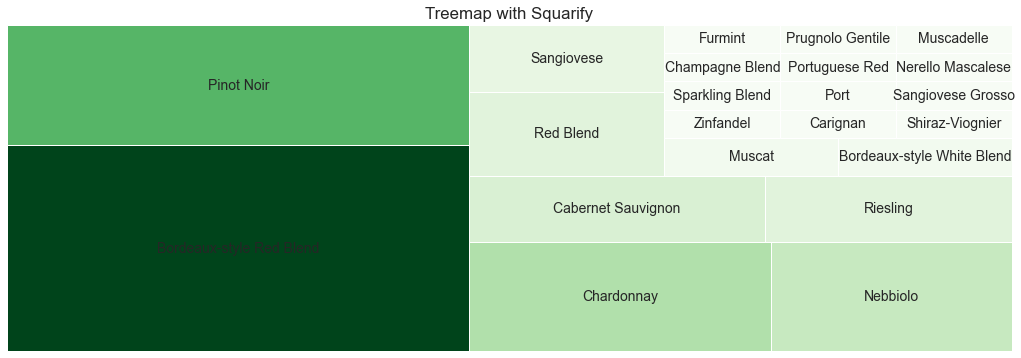

In [83]:
size=best100RatedWines.variety.value_counts().values
labels=best100RatedWines.variety.value_counts().index

# create a color palette, mapped to these values
cmap = matplotlib.cm.Greens
mini=min(size)
maxi=max(size)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in size]

plt.figure(figsize=(18,6))
squarify.plot(sizes=size,label=labels,color=colors).set(title='Treemap with Squarify')
plt.axis('off')

## Best 100 Wines Rated Worldwide

In [84]:
for i in range(best100RatedWines.shape[0]):
    print("{}. Title: {}  Country: {}  Province: {}  Price: ${}".format(i+1,best100RatedWines.title.values[i], best100RatedWines.country.values[i], best100RatedWines.province.values[i], best100RatedWines.price.values[i]))
    print("___________________________________________________________________________________________________________________________\n")

1. Title: Avignonesi 1995 Occhio di Pernice  (Vin Santo di Montepulciano)  Country: Italy  Province: Tuscany  Price: $210.0
___________________________________________________________________________________________________________________________

2. Title: Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen)  Country: Australia  Province: Victoria  Price: $350.0
___________________________________________________________________________________________________________________________

3. Title: Quilceda Creek 2008 Cabernet Sauvignon (Columbia Valley (WA))  Country: US  Province: Washington  Price: $125.0
___________________________________________________________________________________________________________________________

4. Title: Williams Selyem 2009 Precious Mountain Vineyard Pinot Noir (Sonoma Coast)  Country: US  Province: California  Price: $94.0
___________________________________________________________________________________________________________________________



## Best Wines Rated in India

In [85]:
df_India = df.loc[df['country'] =='India'] 
bestRatedWinesIndia = df_India.sort_values(by="points", ascending=False)

for i in range(bestRatedWinesIndia.shape[0]):
    print("{}. Title: {}  Country: {}  Province: {}  Price: ${}".format(i+1,bestRatedWinesIndia.title.values[i], bestRatedWinesIndia.country.values[i], bestRatedWinesIndia.province.values[i], bestRatedWinesIndia.price.values[i]))
    print("___________________________________________________________________________________________________________________________\n")

1. Title: Sula 2011 Dindori Reserve Shiraz (Nashik)  Country: India  Province: Nashik  Price: $20.0
___________________________________________________________________________________________________________________________

2. Title: Sula 2015 Sauvignon Blanc (Nashik)  Country: India  Province: Nashik  Price: $12.0
___________________________________________________________________________________________________________________________

